In [1]:
import os
import cartopy
import matplotlib.pyplot as plt
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np
import geojson
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})
coast_i = cf.GSHHSFeature(scale='i')
coast_h = cf.GSHHSFeature(scale='h')
coast_f = cf.GSHHSFeature(scale='f')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fp2 = FontProperties(fname="/home/ctroupin/.fonts/D-DIN.ttf")

In [2]:
def create_proj(coordinates):
    myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
    return myproj

In [3]:
def add_marker(lon, lat):
    t1 = ax.text(lon, lat, "\uf3c5", fontproperties=fp1, transform=ccrs.PlateCarree(),
            fontsize=20, ha="center", va="bottom", zorder=7, color=mygreen)

In [9]:
def read_geojson(datafile):
    with open(datafile) as f:
        data = geojson.load(f)
        lon = [] 
        lat = []
          
        coords = data['features'][0]['geometry']['coordinates']
        ncoords = len(coords)
        print(f"Coordinates length: {ncoords}")
        
        for contour in coords:
            ncont = len(contour)
            print(f"Contour length: {ncont}")
            if ncont == 1:
                for j in range(0, len(contour[0])):
                    lon.append(contour[0][j][0])
                    lat.append(contour[0][j][1])
            else:
                for j in range(0, ncont):
                        lon.append(contour[j][0])
                        lat.append(contour[j][1])
        return lon, lat

In [26]:
def add_rect(coords, ax, **kwargs):
    lonrect = [coords[0], coords[1], coords[1], coords[0], coords[0]]
    latrect = [coords[2], coords[2], coords[3], coords[3], coords[2]]
    
    ax.plot(lonrect, latrect, transform=data_crs, **kwargs)

## Data and domains
### Region of interest

In [10]:
plotgrid = False
data_crs = ccrs.PlateCarree()
mygreen = "#0C7C0D"
mygray = ".85"
coords_balearic = [1., 4.5, 38.5, 40.25]
coords_canary = [-18.3499, -13., 27.3986, 29.50001]
coords_laspalmas = [-16.1, -13.239, 27.63, 29.46]
coords_combined = [coords_canary[0] - 0.1, coords_balearic[1] + 0.1, 
                   coords_canary[2] - 0.1, coords_balearic[3] + 0.1]
proj_balearic = create_proj(coords_balearic)
proj_canary = create_proj(coords_canary)
proj_comb = create_proj(coords_combined)

laspalmas = (-15.4366, 28.1325)
palmademallorca = (2.649731, 39.568219)

### Contours of islands and cities

In [11]:
lon_lp, lat_lp = read_geojson("./LaPalma.geojson")
lon_lpgc, lat_lpgc = read_geojson("./LasPalmas.geojson")
lon_palma, lat_palma = read_geojson("./Palma.geojson")

Coordinates length: 1
Contour length: 1
Coordinates length: 3
Contour length: 1
Contour length: 1
Contour length: 1
Coordinates length: 1
Contour length: 908


## Maps
### Balearic Islands

In [21]:
def add_island_names(ax, name="Canary"):
    plotkwargs = dict(transform=data_crs, ha="center", fontsize=16, zorder=7, color=".3", 
                      fontproperties=fp1)
    
    if name == "Canary":
        ax.text(-15.5917, 27.875, "Gran Canaria", **plotkwargs)
        ax.text(-16.573, 28.222, "Tenerife", **plotkwargs)
        #ax.text(-17.8391, 28.9, "La Palma", **plotkwargs)
        ax.text(-18.0093, 27.525, "El Hierro", **plotkwargs)
        ax.text(-17.2252, 27.875, "La Gomera", **plotkwargs)
        ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
        ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)
    
    elif name == "Balearic":
        ax.text(4.0375, 39.95, "Menorca", **plotkwargs)
        ax.text(2.95, 39.65, "Mallorca", **plotkwargs)
        ax.text(1.425, 38.975, "Ibiza", **plotkwargs)
        ax.text(1.4529, 38.7075, "Formentera", **plotkwargs)

In [42]:
def plot_balearic(ax, plotgrid=False):
    #ax.set_frame_on(False)

    ax.fill(lon_palma, lat_palma, color=mygreen, transform=data_crs, zorder=6)

    add_island_names(ax, name="Balearic")
    
    if plotgrid:
        # Grid lines and labels
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(1., 6., 0.5))
        gl.ylocator = mticker.FixedLocator(np.arange(38., 42., 0.25))


    ax.add_feature(coast_h, zorder=1, color=".7")
    #ax.text(coords_balearic[0] + .05, coords_balearic[3] - 0.05, "Balearic Islands", 
    #        ha="left", va="top", transform=data_crs, fontsize=24., fontproperties=fp1)


    # add_marker(palmademallorca[0], palmademallorca[1])
    ax.text(palmademallorca[0] - 0.1, palmademallorca[1] - 0.25, "Palma\n(city)", 
            color=mygreen, transform=data_crs, ha="left",
            fontproperties=fp2)

    # Domain extension
    ax.set_extent(coords_balearic)

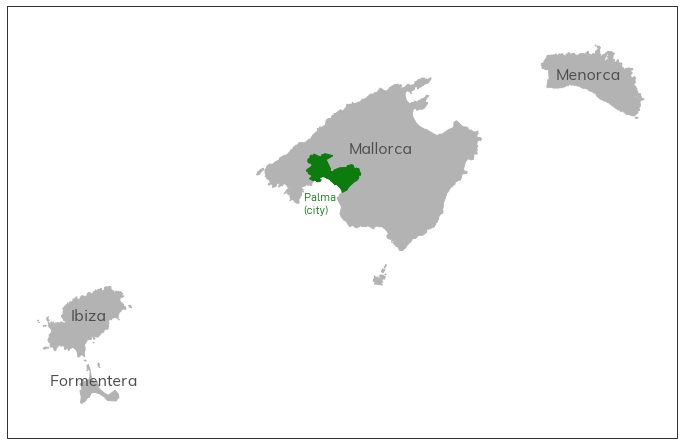

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=proj_balearic)

plot_balearic(ax)

plt.show()
plt.close()

### Canary Islands

In [39]:
def plot_canary(ax, plotgrid=False):
    
    ax.fill(lon_lp, lat_lp, color=mygreen, transform=data_crs, zorder=6)
    ax.fill(lon_lpgc, lat_lpgc, color=mygreen, transform=data_crs, zorder=6)
    

    if plotgrid:
        # Grid lines and labels
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(1., 6., 0.5))
        gl.ylocator = mticker.FixedLocator(np.arange(38., 42., 0.25))


    ax.add_feature(coast_h, zorder=1, color=".7")
    
    add_rect(coords_laspalmas, ax, linestyle="--", linewidth=1, color=mygreen, zorder=2)
    ax.text(coords_laspalmas[0] + 0.025, coords_laspalmas[3] - 0.025, "Las Palmas\n(province)", 
            color=mygreen, ha="left", va="top", fontsize=14,
            transform=data_crs, fontproperties=fp2)


    #add_marker(laspalmas[0], laspalmas[1])
    ax.text(laspalmas[0], laspalmas[1] + 0.1, "Las Palmas\nde Gran Canaria\n(city)", color=mygreen, 
            ha="center", transform=data_crs, fontproperties=fp2)

    add_island_names(ax)
    ax.text(-17.8391, 28.9, "La Palma\n(island)", transform=data_crs, ha="center", fontsize=14, zorder=7, 
            color=mygreen, fontproperties=fp2)

    # Domain extension
    ax.set_extent(coords_canary)

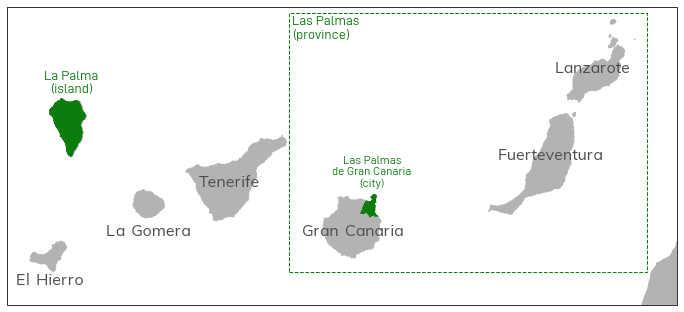

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=proj_canary)

plot_canary(ax)

plt.show()
plt.close()

### Combined

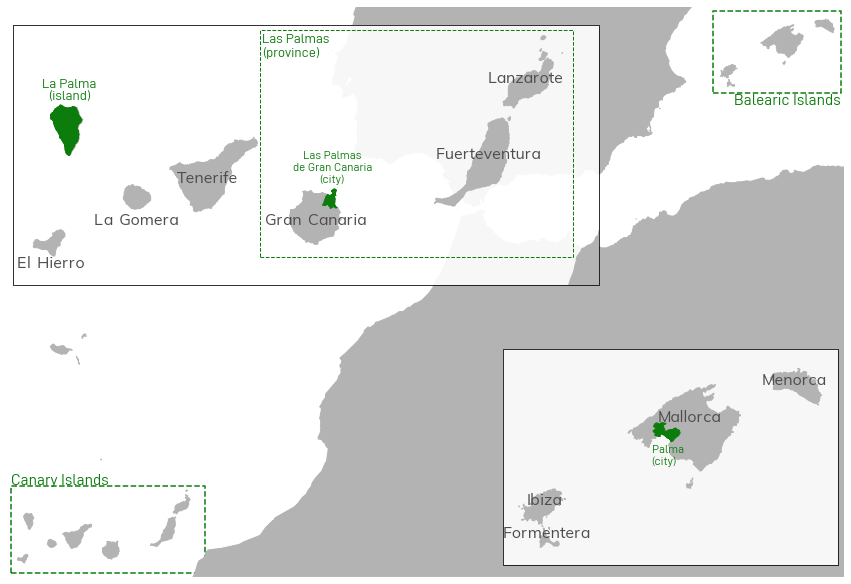

In [43]:
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=proj_comb)

ax.set_frame_on(False)

axins_balearic = inset_axes(ax, width="40%", height="40%", loc=4,
                    axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                    axes_kwargs=dict(map_projection=proj_balearic))
axins_balearic.patch.set_alpha(.9)
plot_balearic(axins_balearic)

axins_canary = inset_axes(ax, width="70%", height="50%", loc=2,
                    axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                    axes_kwargs=dict(map_projection=proj_canary))
axins_canary.patch.set_alpha(.9)
plot_canary(axins_canary)

add_rect(coords_balearic, ax, linestyle="--", color=mygreen, zorder=2)
add_rect(coords_canary, ax, linestyle="--", color=mygreen, zorder=2)


if plotgrid:
    # Grid lines and labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(1., 6., 0.5))
    gl.ylocator = mticker.FixedLocator(np.arange(38., 42., 0.25))

ax.text(coords_balearic[1], coords_balearic[2], "Balearic Islands", 
        transform=data_crs, ha="right", va="top", fontsize=16, zorder=7, 
        color=mygreen, fontproperties=fp2)

ax.text(coords_canary[0], coords_canary[3], "Canary Islands", 
        transform=data_crs, ha="left", va="bottom", fontsize=16, zorder=7, 
        color=mygreen, fontproperties=fp2)

ax.add_feature(coast_i, zorder=3, color=".7")

"""
ax.annotate('', xy=(0.5 * (coords_canary[0] + coords_canary[1]), coords_canary[3]), 
            xytext=(77.20, 28.61),
            xycoords='data',
            size=20,
            arrowprops=dict(facecolor=mygreen, ec = 'none')
           )
        
"""

# Domain extension
ax.set_extent(coords_combined)
plt.savefig("../figures/Palma_LasPalmas_V3.jpg", dpi=300, bbox_inches="tight")

plt.show()
plt.close()